In [1]:
import mne
import numpy as np
import pyedflib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from IPython.display import Image
from IPython.core.display import HTML 


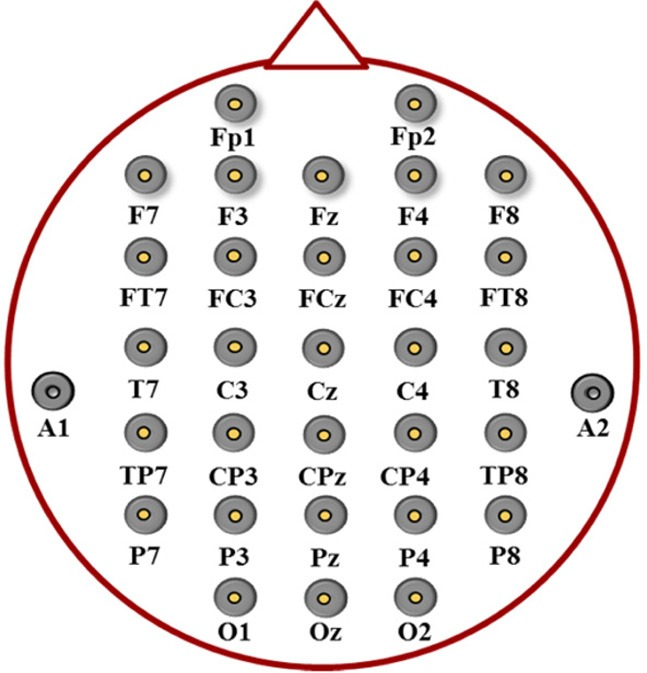

In [52]:
Image(filename = "../Electrode-placements-of-32-channels-according-to-the-international-10-20-system.jpeg", width=500, height=500)

In [274]:
filename = "../train/01_tcp_ar/00000005/s03_2010_10_02/00000005_s03_a00.edf"
filename = "../train/02_tcp_le/00000050/s01_2006_08_06/00000050_s01_a01.edf"
f = pyedflib.EdfReader(filename)

In [275]:
n = f.signals_in_file
signal_labels = f.getSignalLabels()

In [276]:
signal_labels

['EEG FP1-LE',
 'EEG FP2-LE',
 'EEG F3-LE',
 'EEG F4-LE',
 'EEG C3-LE',
 'EEG C4-LE',
 'EEG A1-LE',
 'EEG A2-LE',
 'EEG P3-LE',
 'EEG P4-LE',
 'EEG O1-LE',
 'EEG O2-LE',
 'EEG F7-LE',
 'EEG F8-LE',
 'EEG T3-LE',
 'EEG T4-LE',
 'EEG T5-LE',
 'EEG T6-LE',
 'EEG FZ-LE',
 'EEG CZ-LE',
 'EEG PZ-LE',
 'EEG OZ-LE',
 'EEG PG1-LE',
 'EEG PG2-LE',
 'EEG EKG-LE',
 'EEG 26-LE',
 'EEG 27-LE',
 'EEG 28-LE',
 'EEG 29-LE',
 'EEG 30-LE',
 'EEG 31-LE',
 'EEG 32-LE',
 'PHOTIC PH',
 'DC1-DC',
 'DC2-DC',
 'DC3-DC',
 'DC4-DC',
 'DC5-DC',
 'DC6-DC',
 'DC7-DC',
 'DC8-DC']

In [273]:
signal_labels

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EMG-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [177]:
sigbufs = np.zeros((n, f.getNSamples()[0]))
print(sigbufs.shape)
for i in np.arange(n-3):
    sigbufs[i, :] = f.readSignal(i)

(36, 290500)


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

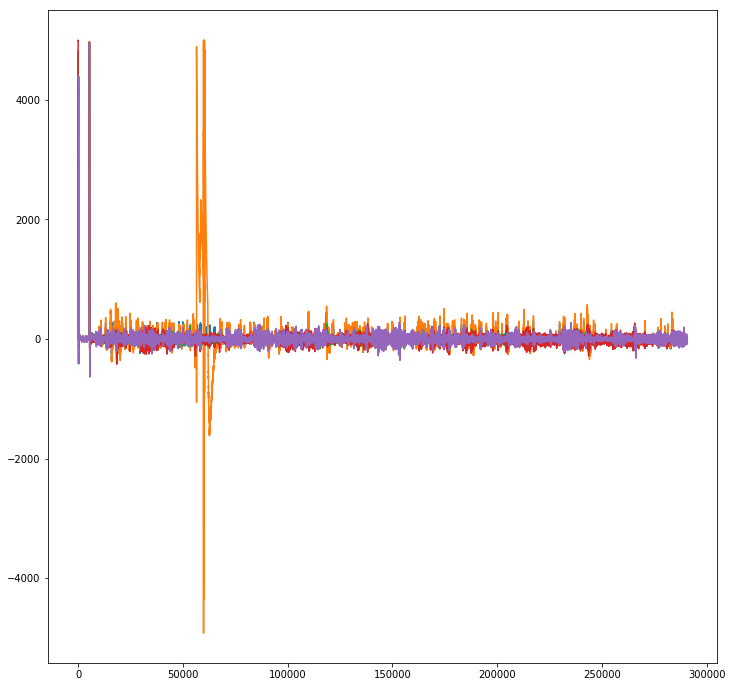

In [179]:
plt.figure(figsize=(12, 12))
for i in range(5):
    plt.plot(np.arange(1, sigbufs.shape[1]+1), sigbufs[i])

In [159]:
labels = open("../train/02_tcp_le/00000050/s02_2006_08_06/00000050_s02_a00.lbl", "r")
labels = labels.read()

In [160]:
labels.split('\n')

['',
 'version = lbl_v1.0.0',
 '',
 'montage = 0, FP1-F7: EEG FP1-LE --  EEG F7-LE',
 'montage = 1, F7-T3:  EEG F7-LE  --  EEG T3-LE',
 'montage = 2, T3-T5:  EEG T3-LE  --  EEG T5-LE',
 'montage = 3, T5-O1:  EEG T5-LE  --  EEG O1-LE',
 'montage = 4, FP2-F8: EEG FP2-LE --  EEG F8-LE',
 'montage = 5, F8-T4:  EEG F8-LE  --  EEG T4-LE',
 'montage = 6, T4-T6:  EEG T4-LE  --  EEG T6-LE',
 'montage = 7, T6-O2:  EEG T6-LE  --  EEG O2-LE',
 'montage = 8, A1-T3:  EEG A1-LE  --  EEG T3-LE',
 'montage = 9, T3-C3:  EEG T3-LE  --  EEG C3-LE',
 'montage = 10, C3-CZ:  EEG C3-LE  --  EEG CZ-LE',
 'montage = 11, CZ-C4:  EEG CZ-LE  --  EEG C4-LE',
 'montage = 12, C4-T4:  EEG C4-LE  --  EEG T4-LE',
 'montage = 13, T4-A2:  EEG T4-LE  --  EEG A2-LE',
 'montage = 14, FP1-F3: EEG FP1-LE --  EEG F3-LE',
 'montage = 15, F3-C3:  EEG F3-LE  --  EEG C3-LE',
 'montage = 16, C3-P3:  EEG C3-LE  --  EEG P3-LE',
 'montage = 17, P3-O1:  EEG P3-LE  --  EEG O1-LE',
 'montage = 18, FP2-F4: EEG FP2-LE --  EEG F4-LE',
 'mont

In [73]:
tse_labels = open("../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a01.tse", "r")
tse_labels = tse_labels.read()

In [74]:
tse_labels.split('\n')

['version = tse_v1.0.0', '', '0.0000 352.0000 bckg 1.0000', '']

In [133]:
import os
i, j = 0, 0
edfs, tses = [], []
for root, dirs, files in os.walk("../train/", topdown=False):
    i+=1
    for name in files:
        print(os.path.join(root, name))
        if name[-3:]=='edf':
            edfs.append(os.path.join(root, name))
        if name[-3:]=='tse':
            tses.append(os.path.join(root, name))
    """
    for name in dirs:
        j+=1
        print('j', j, os.path.join(root, name))"""

../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a02.tse_bi
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a01.lbl_bi
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a00.tse_bi
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a03.lbl_bi
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05.txt
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a03.lbl
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a03.tse
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a02.tse
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a02.lbl
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a00.lbl
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a00.tse
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a01.tse
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a01.lbl
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a00.lbl_bi
../train/02_tcp_le/00002936/s05_2003_01_07/00002936_s05_a00.edf
../train/02_tcp_le/00002936/s

../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a03.lbl
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a02.lbl
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a02.tse
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a05.tse
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a05.lbl
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a04.lbl_bi
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a04.lbl
../train/01_tcp_ar/00001183/s08_2003_08_12/00001183_s08_a04.tse
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a04.tse_bi
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a04.edf
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a05.edf
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a01.edf
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a00.edf
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a02.edf
../train/01_tcp_ar/00001183/s07_2003_08_12/00001183_s07_a05.lbl_bi
../train/01_tcp_ar/00001183/s07

../train/01_tcp_ar/00000177/s04_2012_03_30/00000177_s04_a00.tse_bi
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a00.tse_bi
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a00.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a03.lbl_bi
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a01.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a03.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a02.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a06.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a07.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07.txt
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a02.tse_bi
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a05.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a04.edf
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a01.lbl_bi
../train/01_tcp_ar/00000177/s07_2012_02_09/00000177_s07_a03.lbl
../train/01_tcp_ar/00000177/s

../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a00.tse
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a00.lbl
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a01.lbl
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a01.tse
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a00.tse_bi
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a03.tse
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a03.lbl
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a02.lbl
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a02.tse
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a11.lbl_bi
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a03.lbl_bi
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a05.edf
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a11.edf
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a10.edf
../train/01_tcp_ar/00002277/s06_2013_11_05/00002277_s06_a04.edf
../train/01_tcp_ar/00002277/s06

../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09_a00.tse_bi
../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09_a00.edf
../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09_a00.lbl_bi
../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09.txt
../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09_a00.tse
../train/01_tcp_ar/00002546/s09_2011_03_09/00002546_s09_a00.lbl
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08_a00.lbl_bi
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08_a00.tse_bi
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08_a00.edf
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08.txt
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08_a00.lbl
../train/01_tcp_ar/00002546/s08_2011_03_09/00002546_s08_a00.tse
../train/01_tcp_ar/00000447/s01_2013_03_04/00000447_s01_a00.tse_bi
../train/01_tcp_ar/00000447/s01_2013_03_04/00000447_s01.txt
../train/01_tcp_ar/00000447/s01_2013_03_04/00000447_s01_a00.edf
../train/01_tcp_ar/00000447/s01_2013_

In [251]:
signal_labels[12]

'EEG F7-LE'

In [135]:
edfs = sorted(edfs)
tses = sorted(tses)
pairs = list(zip(edfs, tses))

In [136]:
tses = sorted(tses)

In [168]:
positive = []
count = 0
for i, element in enumerate(pairs):
    file = open(element[1], "r")
    file = file.read()
    file = file.split('\n')
    if len(file)>4:
        count+=1
        #print(file)
        positive.append(element[1])

In [153]:
sigbufs.shape

(36, 290500)

In [171]:
for i, element in enumerate(positive):
    file = open(element, "r")
    file = file.read()
    file = file.split('\n')
    print(file)

['version = tse_v1.0.0', '', '0.0000 260.5028 bckg 1.0000', '260.5028 298.0223 gnsz 1.0000', '298.0223 742.2754 bckg 1.0000', '742.2754 772.6849 fnsz 1.0000', '772.6849 1203.0000 bckg 1.0000', '']
['version = tse_v1.0.0', '', '0.0000 451.2669 bckg 1.0000', '451.2669 472.0069 fnsz 1.0000', '472.0069 659.0000 bckg 1.0000', '']
['version = tse_v1.0.0', '', '0.0000 45.6081 bckg 1.0000', '45.6081 60.0081 fnsz 1.0000', '60.0081 120.0010 bckg 1.0000', '120.0010 134.1010 fnsz 1.0000', '134.1010 158.1091 bckg 1.0000', '158.1091 247.0050 fnsz 1.0000', '247.0050 364.3497 bckg 1.0000', '364.3497 437.0939 fnsz 1.0000', '437.0939 537.4287 bckg 1.0000', '537.4287 637.8431 fnsz 1.0000', '637.8431 711.4497 bckg 1.0000', '711.4497 770.0503 fnsz 1.0000', '770.0503 889.2221 bckg 1.0000', '889.2221 911.3232 fnsz 1.0000', '911.3232 943.0994 bckg 1.0000', '943.0994 989.1613 fnsz 1.0000', '989.1613 1076.4497 bckg 1.0000', '1076.4497 1165.9387 fnsz 1.0000', '1165.9387 1262.0000 bckg 1.0000', '']
['version = ts

(30, 300750)


No handles with labels found to put in legend.


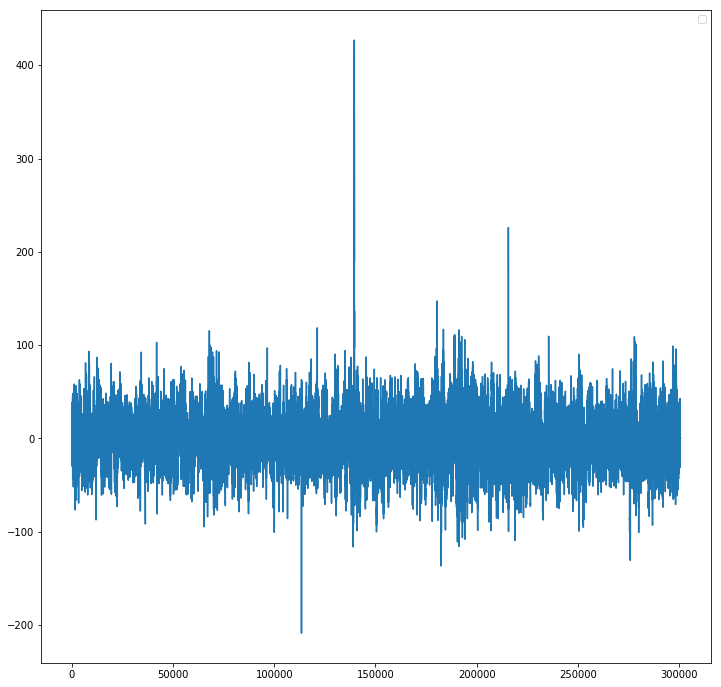

In [216]:
filename = positive[0]
#f = pyedflib.EdfReader(filename[:-3]+'edf')
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
print(sigbufs.shape)
for i in np.arange(n-3):
    sigbufs[i, :] = f.readSignal(i)
plt.figure(figsize=(12, 12))
for i in range(1):
    plt.plot(np.arange(1, sigbufs.shape[1]+1), sigbufs[0]-sigbufs[10])
plt.plot()
plt.legend()

In [185]:
file = open(positive[0], "r")
file = file.read()
file = file.split('\n')
print(file)

['version = tse_v1.0.0', '', '0.0000 260.5028 bckg 1.0000', '260.5028 298.0223 gnsz 1.0000', '298.0223 742.2754 bckg 1.0000', '742.2754 772.6849 fnsz 1.0000', '772.6849 1203.0000 bckg 1.0000', '']


In [261]:
signal_labels[10]

'EEG O1-LE'

In [204]:
772*250

193000

In [211]:
9022500/300750

30.0

In [212]:
file = open(positive[0][:-3] + 'lbl', "r")
file = file.read()
file = file.split('\n')
file

['',
 'version = lbl_v1.0.0',
 '',
 'montage = 0, FP1-F7: EEG FP1-REF --  EEG F7-REF',
 'montage = 1, F7-T3:  EEG F7-REF  --  EEG T3-REF',
 'montage = 2, T3-T5:  EEG T3-REF  --  EEG T5-REF',
 'montage = 3, T5-O1:  EEG T5-REF  --  EEG O1-REF',
 'montage = 4, FP2-F8: EEG FP2-REF --  EEG F8-REF',
 'montage = 5, F8-T4:  EEG F8-REF  --  EEG T4-REF',
 'montage = 6, T4-T6:  EEG T4-REF  --  EEG T6-REF',
 'montage = 7, T6-O2:  EEG T6-REF  --  EEG O2-REF',
 'montage = 8, A1-T3:  EEG A1-REF  --  EEG T3-REF',
 'montage = 9, T3-C3:  EEG T3-REF  --  EEG C3-REF',
 'montage = 10, C3-CZ:  EEG C3-REF  --  EEG CZ-REF',
 'montage = 11, CZ-C4:  EEG CZ-REF  --  EEG C4-REF',
 'montage = 12, C4-T4:  EEG C4-REF  --  EEG T4-REF',
 'montage = 13, T4-A2:  EEG T4-REF  --  EEG A2-REF',
 'montage = 14, FP1-F3: EEG FP1-REF --  EEG F3-REF',
 'montage = 15, F3-C3:  EEG F3-REF  --  EEG C3-REF',
 'montage = 16, C3-P3:  EEG C3-REF  --  EEG P3-REF',
 'montage = 17, P3-O1:  EEG P3-REF  --  EEG O1-REF',
 'montage = 18, FP2-F